# Grover's Algorithm in Qiskit
This notebook demonstrates Grover's algorithm using Qiskit.

## Importing Required Libraries
We start by importing the necessary libraries from Qiskit and Qiskit Aer.

In [12]:

import math
from qiskit import QuantumCircuit, transpile, assemble, execute
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram


## Defining the Grover Oracle
The Grover oracle marks specific states as solutions. It applies a phase flip to the marked states.

In [13]:

def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states."""
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    num_qubits = len(marked_states[0])
    qc = QuantumCircuit(num_qubits)
    for target in marked_states:
        rev_target = target[::-1]  # Reverse to match Qiskit's ordering
        zero_inds = [ind for ind in range(num_qubits) if rev_target[ind] == "0"]
        qc.x(zero_inds)  # Apply X gates to zero positions
        qc.h(num_qubits - 1)
        qc.mcx(list(range(num_qubits - 1)), num_qubits - 1)  # Multi-controlled Toffoli
        qc.h(num_qubits - 1)
        qc.x(zero_inds)
    return qc


## Setting Marked States and Creating the Oracle
Here, we define the states that Grover's algorithm will search for and create the corresponding oracle.

In [28]:

marked_states = ["110", "010", "001"]
oracle = grover_oracle(marked_states)


## Calculating the Number of Grover Iterations
The number of Grover iterations is computed using the formula:
$$ k = \lfloor \frac{\pi}{4} \frac{1}{\arcsin{\sqrt{M/N}}} \rfloor $$
where $M$ is the number of marked states and $N$ is the total number of states (i.e., $2^{n}$ for $n$ qubits).

In [29]:

num_qubits = len(marked_states[0])
grover_iterations = math.floor(math.pi / (4 * math.asin(math.sqrt(len(marked_states) / 2**num_qubits))))


## Constructing the Grover Circuit
The circuit consists of:
- **Hadamard gates** to initialize the superposition state
- **Oracle application** to mark solutions
- **Grover diffusion operator** to amplify the marked states

In [30]:

qc = QuantumCircuit(num_qubits)
qc.h(range(num_qubits))  # Initial superposition

for _ in range(grover_iterations):
    qc.compose(oracle, inplace=True)  # Apply the oracle
    qc.h(range(num_qubits))
    qc.x(range(num_qubits))
    qc.h(num_qubits - 1)
    qc.mcx(list(range(num_qubits - 1)), num_qubits - 1)  # Multi-controlled Toffoli
    qc.h(num_qubits - 1)
    qc.x(range(num_qubits))
    qc.h(range(num_qubits))

qc.measure_all()  # Measurement step


## Running the Quantum Simulation
We use Qiskit's Aer simulator to run the circuit and collect measurement results.

In [31]:

simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit, shots=10000)
result = execute(compiled_circuit, simulator).result()
counts = result.get_counts()


/var/folders/6s/xdq07j0n3yx8m9w4vxjz__gr0000gp/T/ipykernel_81222/1083632934.py:4: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(compiled_circuit, simulator).result()


## Plotting the Measurement Results
The histogram below shows the probability distribution of measured states, with marked states appearing most frequently.

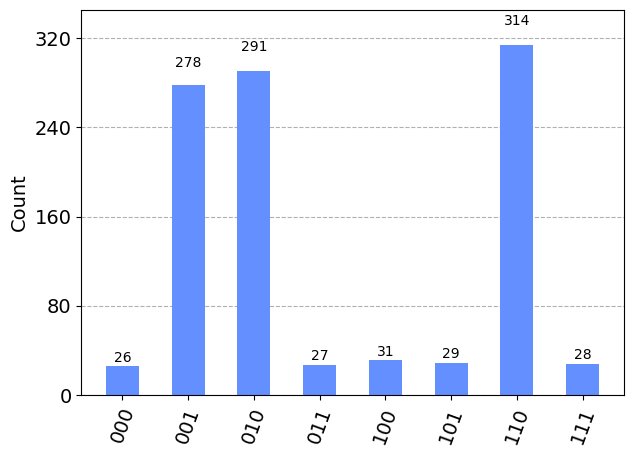

In [32]:

plot_histogram(counts)


# Bonus

## CHALLENGE 1

Implement this for 6 qubits on a 5 length bitstring search

## CHALLENGE 2

Generalise this code to work for any N

## CHALLENGE 3

Implement Grover's algorithm to solve a search problem. 

### **Most innovative solution gets an extra reward**